In [1]:
import pandas as pd
import numpy as np

In [2]:
# 5.1 pandas 数据结构介绍
# 5.1.1 Series
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [6]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [7]:
obj2['a']

-5

In [8]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    4
dtype: int64

In [9]:
obj2[obj2 > 0]

d    4
b    7
c    3
dtype: int64

In [10]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [11]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [12]:
'b' in obj2

True

In [13]:
'e' in obj2

False

In [14]:
# from dict to series
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [15]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [16]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [17]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [18]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [19]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [20]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [21]:
# join in SQL?
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [22]:
# name
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [23]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [24]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

In [25]:
# 5.1.2 DataFrame
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [26]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [27]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [28]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                         index=['one', 'two','three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [29]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [30]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [31]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [32]:
# .loc
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [33]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [34]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [35]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [36]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [37]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [38]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
# Outer Keys as columns, Inner Keys as index
frame3 = pd.DataFrame(pop, index=[2000, 2001, 2002])
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [39]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [40]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [41]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


In [42]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [43]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [44]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

In [45]:
# 5.1.3 索引对象
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [46]:
index[1:]

Index(['b', 'c'], dtype='object')

In [47]:
# 不可变
index[1] = 'd'

TypeError: Index does not support mutable operations

In [48]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [49]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [50]:
obj2.index is labels

True

In [51]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [52]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [53]:
'Ohio' in frame3.columns

True

In [54]:
2003 in frame3.index

False

In [55]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

In [56]:
# 5.2 基本功能
# 5.2.1 重建索引
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [57]:
# .reindex
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [58]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [59]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [60]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [61]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [62]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [63]:
# 5.2.2 轴向上删除条目
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [64]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [65]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [66]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [67]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [68]:
# axis=1 / axis='columns'
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [69]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [70]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [71]:
# 5.2.3 索引、选择与过滤
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [72]:
obj['b']

1.0

In [73]:
obj[1]

1.0

In [74]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [75]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [76]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [77]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [78]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [79]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [80]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [81]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [82]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [83]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [84]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [85]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [86]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [87]:
# .loc / .iloc
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [88]:
data.iloc[2, [3, 0 ,1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [89]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [90]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [91]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [92]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [93]:
# 5.2.4 整数索引
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [94]:
ser[-1]

KeyError: -1

In [95]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [96]:
ser[:1]

0    0.0
dtype: float64

In [97]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [98]:
ser.iloc[:1]

0    0.0
dtype: float64

In [99]:
# 5.2.5 算术和数据对齐
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [100]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [101]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [102]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [103]:
df1 = pd.DataFrame(np.arange(9.).reshape(3, 3), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [104]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [105]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [106]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [107]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})

In [108]:
df1

,A
0,1
1,2


In [109]:
df2

,B
0,3
1,4


In [110]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


In [111]:
# 5.2.5.1 使用填充值的算术方法
df1 = pd.DataFrame(np.arange(12.).reshape(3, 4), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape(4, 5), columns=list('abcde'))
df2.loc[1, 'b'] = np.nan

In [112]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [113]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [114]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [115]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [116]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [117]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [118]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [119]:
# 5.2.5.2 DataFrame和Series间的操作
arr = np.arange(12.).reshape(3, 4)
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [120]:
arr[0]

array([0., 1., 2., 3.])

In [121]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [122]:
frame = pd.DataFrame(np.arange(12.).reshape(4, 3),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]

In [123]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [124]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [125]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [126]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [127]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [128]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [129]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [130]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [131]:
# 5.2.6 函数应用和映射
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-1.089702,-0.271011,0.414166
Ohio,-1.248556,0.045549,0.536801
Texas,-0.073833,0.372758,0.436628
Oregon,0.237076,-1.085367,-1.624956


In [132]:
np.abs(frame)

,b,d,e
Utah,1.089702,0.271011,0.414166
Ohio,1.248556,0.045549,0.536801
Texas,0.073833,0.372758,0.436628
Oregon,0.237076,1.085367,1.624956


In [133]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.485632
d    1.458125
e    2.161757
dtype: float64

In [134]:
frame.apply(f, axis='columns')

Utah      1.503868
Ohio      1.785357
Texas     0.510461
Oregon    1.862032
dtype: float64

In [135]:
def F(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(F)

,b,d,e
min,-1.248556,-1.085367,-1.624956
max,0.237076,0.372758,0.536801


In [136]:
fmt = lambda x: '%.2f' % x
frame.applymap(fmt)

,b,d,e
Utah,-1.09,-0.27,0.41
Ohio,-1.25,0.05,0.54
Texas,-0.07,0.37,0.44
Oregon,0.24,-1.09,-1.62


In [137]:
frame['e'].map(fmt)

Utah       0.41
Ohio       0.54
Texas      0.44
Oregon    -1.62
Name: e, dtype: object

In [138]:
# 5.2.7 排序和排名
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [139]:
frame = pd.DataFrame(np.arange(8).reshape(2, 4),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [140]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [141]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [142]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [143]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [144]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]}).sort_index(axis=1)
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [145]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [146]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [147]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [148]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [149]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [150]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2],
                      'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]}).sort_index(axis=1)
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [151]:
frame.rank(axis='columns')

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


In [152]:
# 5.2.8 含有重复标签的轴索引
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [153]:
obj.index.is_unique

False

In [154]:
obj['a']

a    0
a    1
dtype: int64

In [155]:
obj['c']

4

In [156]:
# 5.3 描述性统计的概述与计算
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [157]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [158]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [159]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [160]:
df.idxmax()

one    b
two    d
dtype: object

In [161]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [162]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [163]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [165]:
# 5.3.1 相关性和协方差
import pandas_datareader.data as web

In [166]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
volumn = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

In [167]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-07-12,-0.004204,-0.004240,-0.002231,0.007637
2021-07-13,0.007889,-0.004542,0.013198,0.003297
2021-07-14,0.024100,-0.003279,0.005445,0.008306
2021-07-15,-0.004492,0.004506,-0.005239,-0.006178
2021-07-16,-0.014076,-0.011036,-0.000996,0.004411


In [168]:
price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-07-12,144.500000,140.919998,277.320007,2611.280029
2021-07-13,145.639999,140.279999,280.980011,2619.889893
2021-07-14,149.149994,139.820007,282.510010,2641.649902
2021-07-15,148.479996,140.449997,281.029999,2625.330078
2021-07-16,146.389999,138.899994,280.750000,2636.909912


In [169]:
returns['MSFT'].corr(returns['IBM'])

0.517692919053422

In [170]:
returns['MSFT'].cov(returns['IBM'])

0.00014566864620379913

In [171]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.437791,0.726313,0.658214
IBM,0.437791,1.000000,0.517693,0.483699
MSFT,0.726313,0.517693,1.000000,0.773483
GOOG,0.658214,0.483699,0.773483,1.000000


In [172]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000364,0.000137,0.000238,0.000211
IBM,0.000137,0.000267,0.000146,0.000133
MSFT,0.000238,0.000146,0.000296,0.000223
GOOG,0.000211,0.000133,0.000223,0.000281


In [173]:
returns.corrwith(returns.IBM)

AAPL    0.437791
IBM     1.000000
MSFT    0.517693
GOOG    0.483699
dtype: float64

In [174]:
returns.corr()['IBM']

AAPL    0.437791
IBM     1.000000
MSFT    0.517693
GOOG    0.483699
Name: IBM, dtype: float64

In [176]:
returns.corrwith(volumn)

AAPL   -0.050903
IBM    -0.105080
MSFT   -0.043543
GOOG   -0.109372
dtype: float64

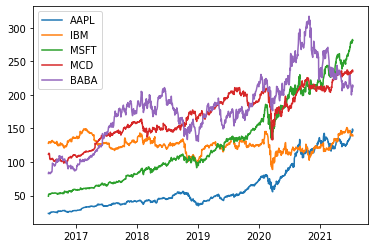

In [183]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web

all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'MCD', 'BABA']}
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
volumn = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

for i in range(5):
    plt.plot(price.iloc[:, i], label=price.columns[i])
plt.legend()
plt.show()

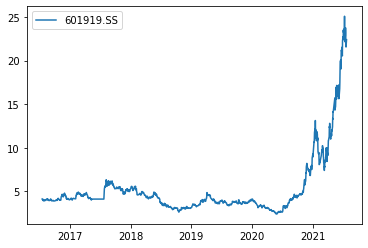

In [186]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['601919.SS']}
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
volumn = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

plt.plot(price.iloc[:, :], label=price.columns[0])
plt.legend()
plt.show()

In [200]:
# 5.3.2 唯一值、计数和成员属性
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [202]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [203]:
pd.value_counts(obj.values, sort=False)

c    3
b    2
d    1
a    3
dtype: int64

In [204]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [205]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [206]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [207]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [208]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [209]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
